In [115]:
import pandas as pd

csv_file_path = r'C:\Users\reyma\OneDrive\Documents\lab5\CompetitionTags.csv'
csv_data = pd.read_csv(csv_file_path)

json_file_path = r'C:\Users\reyma\OneDrive\Documents\lab5\arxiv-metadata-oai-snapshot.json'
json_data = pd.read_json(json_file_path, lines=True, nrows=30000)  

"CSV Data Head:"
csv_data.head()
"\nJSON Data Head:"
json_data.head()


,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"
3,704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]"
4,704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


In [18]:
print("CSV Data Columns:")
print(csv_data.columns)
print("\nJSON Data Columns:")
print(json_data.columns)


CSV Data Columns:
Index(['Id', 'CompetitionId', 'TagId'], dtype='object')

JSON Data Columns:
Index(['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed', 'keywords'],
      dtype='object')


In [116]:
json_data = json_data.drop_duplicates(subset=['title', 'abstract', 'update_date']).dropna(subset=['title', 'abstract', 'update_date'])

json_data['update_date'] = pd.to_datetime(json_data['update_date'], errors='coerce')

json_data = json_data.dropna(subset=['update_date'])

from sklearn.feature_extraction.text import CountVectorizer

def extract_keywords_from_text(text_series):
    combined_text = text_series.str.cat(sep=' ')
    vectorizer = CountVectorizer(stop_words='english', max_features=10)
    X = vectorizer.fit_transform([combined_text])
    return vectorizer.get_feature_names_out()

json_data['keywords'] = json_data.apply(lambda row: extract_keywords_from_text(pd.Series([row['title'], row['abstract']])), axis=1)

print("Cleaned JSON Data Head:")
json_data.head()


Cleaned JSON Data Head:


,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,keywords
0,704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,...","[calculation, diphoton, gluon, hadron, leading..."
1,704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]","[characterization, colors, ell, gabow, game, g..."
2,704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]","[10, dark, described, earth, evolution, field,..."
3,704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]","[acyclic, automata, counts, cycle, determinant..."
4,704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]","[alpha, dyadic, grid, hardy, lambda_, norm, pa..."


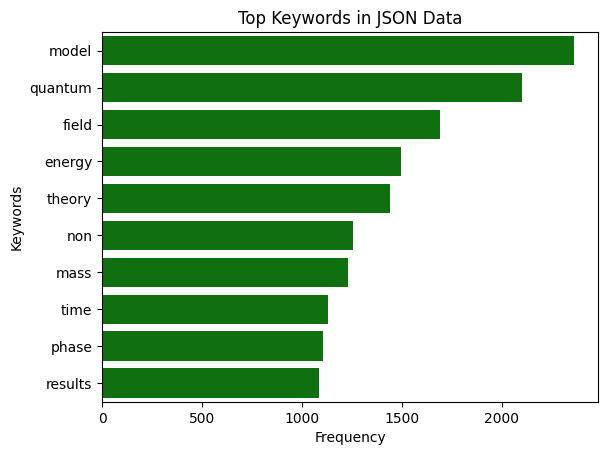

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_keywords(data, title, color):
    all_keywords = [keyword for sublist in data['keywords'] for keyword in sublist]
    keywords_series = pd.Series(all_keywords).value_counts().head(10)
    sns.barplot(x=keywords_series.values, y=keywords_series.index, color=color)
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Keywords')
    plt.show()

plot_top_keywords(json_data, 'Top Keywords in JSON Data', 'green')


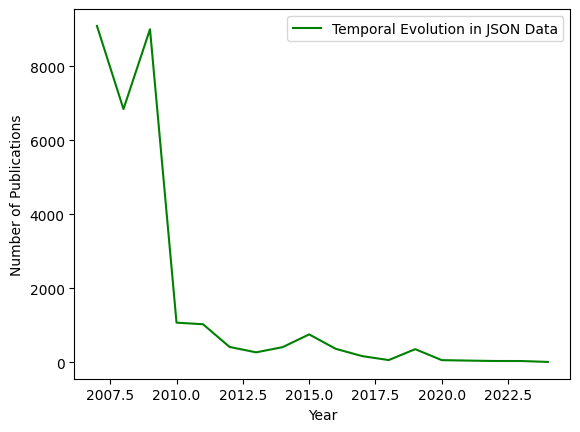

In [119]:
def plot_temporal_evolution(data, title, color):
    data['year'] = data['update_date'].dt.year
    yearly_counts = data['year'].value_counts().sort_index()
    plt.plot(yearly_counts.index, yearly_counts.values, label=title, color=color)
    plt.xlabel('Year')
    plt.ylabel('Number of Publications')
    plt.legend()
    plt.show()

plot_temporal_evolution(json_data, 'Temporal Evolution in JSON Data', 'green')


C:\Users\reyma\AppData\Local\Temp\ipykernel_15508\1099162084.py:19: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


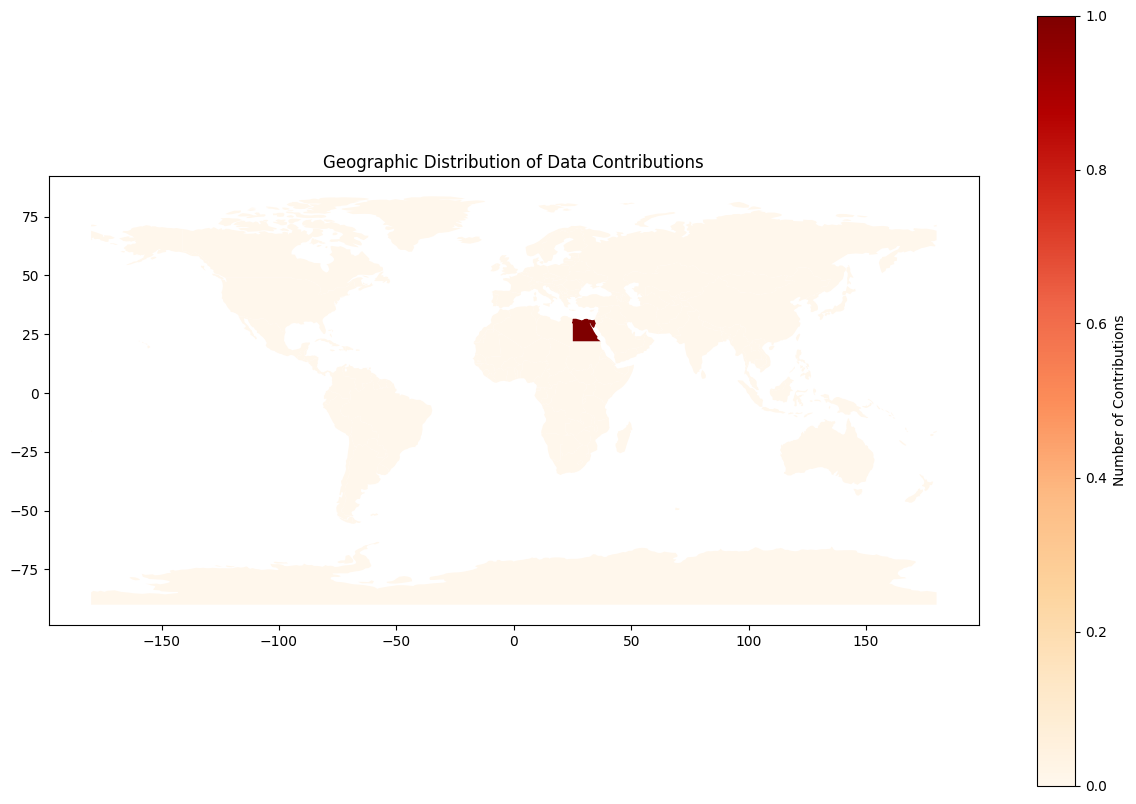

In [138]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import re

json_file_path = r'C:\Users\reyma\OneDrive\Documents\lab5\arxiv-metadata-oai-snapshot.json'
json_data = pd.read_json(json_file_path, lines=True, nrows=30000)

def extract_location_from_authors(authors_text):
    location_pattern = r'\b(?:at|from|in)\b\s*([A-Za-z\s,]+)'
    matches = re.findall(location_pattern, str(authors_text), flags=re.IGNORECASE)
    return matches

json_data['extracted_locations'] = json_data['authors'].apply(extract_location_from_authors)

all_locations = [location for locations in json_data['extracted_locations'] for location in locations]
unique_locations = list(set(all_locations))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

location_counts = pd.Series(all_locations).value_counts()

world['counts'] = world['name'].map(location_counts).fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='counts', ax=ax, legend=True, cmap='OrRd', legend_kwds={'label': "Number of Contributions"})
plt.title('Geographic Distribution of Data Contributions')
plt.show()


In [113]:
import pandas as pd

csv_file_path = r'C:\Users\reyma\OneDrive\Documents\lab5\CompetitionTags.csv'
csv_data = pd.read_csv(csv_file_path)

top_10_tag_ids = csv_data['TagId'].value_counts().head(10)
top_10_competition_ids = csv_data['CompetitionId'].value_counts().head(10)

top_10_tag_ids_df = pd.DataFrame({'TagId': top_10_tag_ids.index, 'Frequency': top_10_tag_ids.values})

top_10_competition_ids_df = pd.DataFrame({'CompetitionId': top_10_competition_ids.index, 'Frequency': top_10_competition_ids.values})

print("\nTop 10 Most Common TagIds:")
print(top_10_tag_ids_df)
print("\nTop 10 Most Common CompetitionIds:")
print(top_10_competition_ids_df)



Top 10 Most Common TagIds:
   TagId  Frequency
0  14101        172
1  14102        115
2  14202         56
3  14201         53
4  14104         42
5  13102         34
6  14203         30
7  13207         20
8  12116         18
9   2606         18

Top 10 Most Common CompetitionIds:
   CompetitionId  Frequency
0          58266          5
1          51294          5
2          35779          5
3          68699          5
4          59110          5
5          26933          5
6          33607          4
7          52324          4
8           5186          4
9          53377          4


C:\Users\reyma\AppData\Local\Temp\ipykernel_15508\2175384270.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_tag_ids.index, y=top_10_tag_ids.values, palette="viridis")


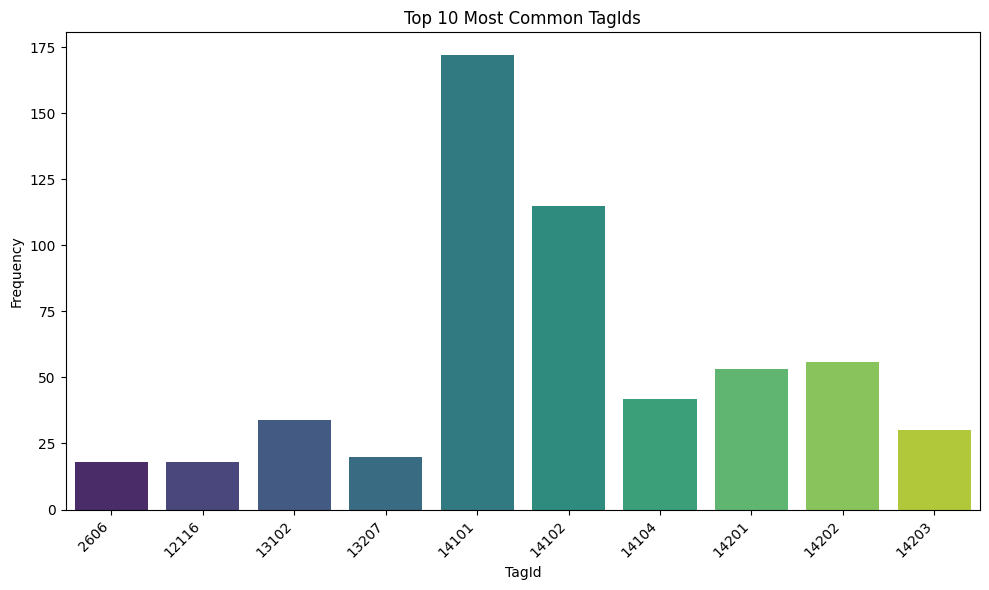

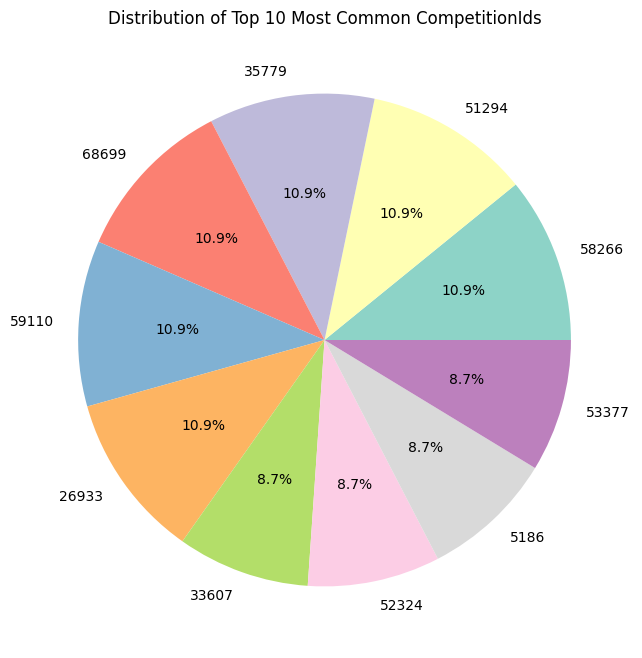

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_path = r'C:\Users\reyma\OneDrive\Documents\lab5\CompetitionTags.csv'
csv_data = pd.read_csv(csv_file_path)

top_10_tag_ids = csv_data['TagId'].value_counts().head(10)
top_10_competition_ids = csv_data['CompetitionId'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_tag_ids.index, y=top_10_tag_ids.values, palette="viridis")
plt.title('Top 10 Most Common TagIds')
plt.xlabel('TagId')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
top_10_competition_ids.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("Set3"))
plt.title('Distribution of Top 10 Most Common CompetitionIds')
plt.ylabel('')
plt.show()


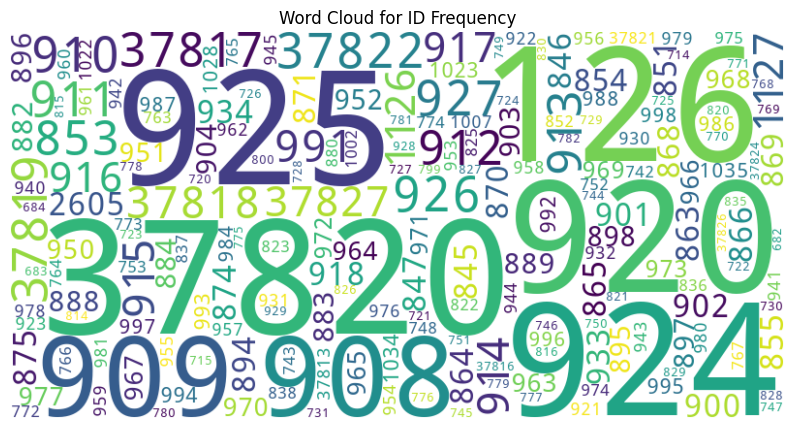

In [111]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(csv_data['Id'].value_counts())

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for ID Frequency')
plt.axis('off')
plt.show()
